In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('gender_classification_v7.csv')
df.head()



,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


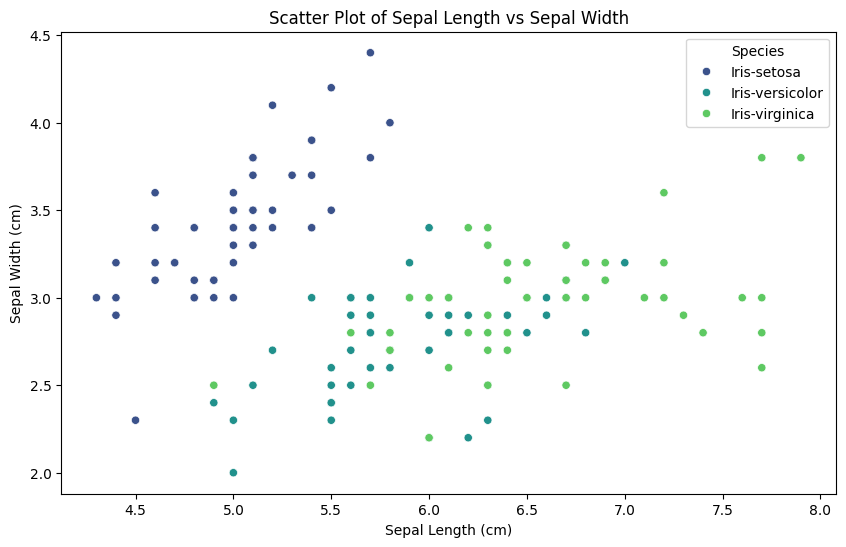

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('Iris.csv')

# Display the first few rows
print(df.head())

# Scatter plot for Sepal Length vs Sepal Width, colored by Species
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the Iris dataset
df = pd.read_csv('Iris.csv')

# Display the first few rows
print(df.head())

# Extract only two features: SepalLengthCm and SepalWidthCm
X = df[['SepalLengthCm', 'SepalWidthCm']].values
y = df['Species'].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
def plot_decision_boundary(X, y, clf, title):
    plt.figure(figsize=(10, 6))
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.show()


In [ ]:
clf_linear = svm.SVC(kernel='linear', C=1)
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)

# Accuracy and classification report
print("Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_linear, 'SVM with Linear Kernel')


Linear Kernel
Accuracy: 0.8
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.70      0.54      0.61        13
 Iris-virginica       0.62      0.77      0.69        13

       accuracy                           0.80        45
      macro avg       0.78      0.77      0.77        45
   weighted avg       0.81      0.80      0.80        45



ValueError: cannot reshape array of size 325890 into shape (355,306)

<Figure size 1000x600 with 0 Axes>

In [1]:
clf_poly2 = svm.SVC(kernel='poly', degree=2, C=1)
clf_poly2.fit(X_train, y_train)
y_pred_poly2 = clf_poly2.predict(X_test)

# Accuracy and classification report
print("Polynomial Kernel (Degree 2)")
print("Accuracy:", accuracy_score(y_test, y_pred_poly2))
print(classification_report(y_test, y_pred_poly2, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_poly2, 'SVM with Polynomial Kernel (Degree 2)')


NameError: name 'svm' is not defined

In [ ]:
clf_poly3 = svm.SVC(kernel='poly', degree=3, C=1)
clf_poly3.fit(X_train, y_train)
y_pred_poly3 = clf_poly3.predict(X_test)

# Accuracy and classification report
print("Polynomial Kernel (Degree 3)")
print("Accuracy:", accuracy_score(y_test, y_pred_poly3))
print(classification_report(y_test, y_pred_poly3, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_poly3, 'SVM with Polynomial Kernel (Degree 3)')


In [ ]:
def non_homogeneous_kernel(X, Y):
    return (np.dot(X, Y.T) ** 3)

clf_non_homogeneous = svm.SVC(kernel=non_homogeneous_kernel, C=1)
clf_non_homogeneous.fit(X_train, y_train)
y_pred_non_homogeneous = clf_non_homogeneous.predict(X_test)

# Accuracy and classification report
print("Non-Homogeneous Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_non_homogeneous))
print(classification_report(y_test, y_pred_non_homogeneous, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_non_homogeneous, 'SVM with Non-Homogeneous Kernel')


In [ ]:
clf_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=1)
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

# Accuracy and classification report
print("Gaussian (RBF) Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_rbf, 'SVM with Gaussian (RBF) Kernel')


In [ ]:
def laplacian_kernel(X, Y, gamma=1):
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2, ord=1))

clf_laplacian = svm.SVC(kernel=lambda X, Y: laplacian_kernel(X, Y, gamma=0.5), C=1)
clf_laplacian.fit(X_train, y_train)
y_pred_laplacian = clf_laplacian.predict(X_test)

# Accuracy and classification report
print("Laplacian Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_laplacian))
print(classification_report(y_test, y_pred_laplacian, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_laplacian, 'SVM with Laplacian Kernel')


In [ ]:
clf_sigmoid = svm.SVC(kernel='sigmoid', gamma=0.5, coef0=0, C=1)
clf_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = clf_sigmoid.predict(X_test)

# Accuracy and classification report
print("Sigmoid Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
print(classification_report(y_test, y_pred_sigmoid, target_names=le.classes_))

# Plot decision boundary
plot_decision_boundary(X_train, y_train, clf_sigmoid, 'SVM with Sigmoid Kernel')
